# Análisis de factores asociados a crímenes violentos (Communities & Crime)

## Temática y fuente

Los datos combinan datos socioeconómicos del censo de 1990, datos de aplicación de la ley de la encuesta de gestión y estadísticas administrativas de aplicación de la ley de 1990 y datos sobre delincuencia de la UCR.

El dataset se obtuvo desde https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized







## Información adicional sobre el Dataset

Los conjuntos de datos de origen debían combinarse mediante programación. Se incluyen muchas variables para poder probar algoritmos que seleccionan o aprenden pesos para atributos. Sin embargo, no se incluyeron atributos claramente no relacionados; se eligieron atributos si había alguna conexión plausible con el delito (N=125), más las variables del delito que son variables dependientes potenciales. Las variables incluidas en el conjunto de datos involucran a la comunidad, como el porcentaje de la población considerada urbana y el ingreso familiar medio, e involucran a las fuerzas del orden, como el número per cápita de agentes de policía y el porcentaje de agentes asignados a unidades de drogas. Los atributos delictivos (N=18) que podrían predecirse son los 8 delitos considerados 'delitos índice' por el FBI) (asesinatos, violaciones, robos, .... ), versiones per cápita (en realidad por cada 100.000 habitantes) de cada uno,y Delitos Violentos Per Capita y Delitos No Violentos Per Capita).
  
Una limitación fue que la encuesta LEMAS se realizó en los departamentos de policía con al menos 100 oficiales, más una muestra aleatoria de departamentos más pequeños. Para nuestros propósitos, se omitieron las comunidades que no se encuentran en los conjuntos de datos censales y sobre delincuencia. A muchas comunidades les faltan datos de LEMAS.

Las variables de delitos per cápita se calcularon utilizando valores de población incluidos en los datos del FBI de 1995 (que difieren de los valores del censo de 1990).

La variable delitos violentos per cápita se calculó utilizando la población y la suma de las variables delictivas consideradas delitos violentos en los Estados Unidos: asesinato, violación, robo y agresión. Al parecer hubo cierta controversia en algunos estados sobre el recuento de violaciones. Esto dio lugar a que faltaran valores para la violación,lo que dio lugar a que faltaran valores para los delitos violentos per cápita. Muchas de estas comunidades omitidas eran del medio oeste de Estados Unidos (Minnesota, Illinois y Michigan tienen muchas de ellas).  
  
La variable de delitos no violentos per cápita se calculó utilizando la suma de las variables delictivas consideradas delitos no violentos en Estados Unidos: robos, hurtos, hurtos de automóviles e incendios provocados. (Existen muchos otros tipos de delitos, entre los que sólo se incluyen los 'delitos índice' del FBI)



## Objetivo

La **variable target** del estudio es **`ViolentCrimesPerPop`**, que representa la **proporción de crímenes violentos por habitante** (valor normalizado entre 0 y 1).  
El propósito central del análisis es **identificar los factores socioeconómicos y demográficos más asociados a la violencia** y evaluar la capacidad de distintos **modelos de regresión** para predecir esta variable.


## Preguntas a responder

- ¿Qué variables sociodemográficas se asocian más con `ViolentCrimesPerPop`?
- ¿La pobreza, educación o estructura familiar influyen en el crimen?
- ¿Se pueden agrupar comunidades con perfiles de riesgo similares?
- ¿Podemos predecir correctamente comunidades con alta tasa de crímenes violentos?

# Data wrangling

## Bloques de códigos

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.pipeline import Pipeline
import warnings; warnings.filterwarnings('ignore')

# Liberias para realizar graficas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Entrenamiento del Modelo
from sklearn.model_selection import train_test_split, cross_val_score, KFold


In [2]:
url = 'https://drive.google.com/file/d/1U1B0kG40_1uLM3Pu28LkzKT42jGt25RN/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_orig = pd.read_csv(path, na_values=['?'], header=None)

In [32]:
print("Dimensión inicial:", df_orig.shape)

Dimensión inicial: (2215, 147)


In [4]:
df_orig.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
1742,NorthRidgevillecity,OH,93.0,56966.0,8,21564,3.02,0.64,98.23,0.63,...,76.0,337.51,214.0,950.35,22.0,97.70,1.0,4.44,248.69,1390.00
1234,Cadillaccity,MI,165.0,12320.0,6,10104,2.53,0.21,98.43,0.48,...,69.0,657.08,532.0,5066.18,17.0,161.89,3.0,28.57,NaN,5913.72
461,SantaMonicacity,CA,NaN,NaN,3,86905,1.94,4.51,82.80,6.39,...,1511.0,1727.17,6181.0,7065.29,1754.0,2004.94,137.0,156.60,1651.73,10954.00
1231,Waynesborocity,VA,820.0,83680.0,6,18549,2.45,9.43,89.93,0.24,...,136.0,718.17,597.0,3152.56,57.0,301.00,5.0,26.40,337.96,4198.13
385,Harvardtown,MA,27.0,28950.0,2,12329,4.14,12.22,82.41,2.65,...,4.0,31.14,10.0,77.86,1.0,7.79,0.0,0.00,7.79,116.79
2110,Concordcity,NH,13.0,14200.0,10,36006,2.53,0.63,98.18,0.67,...,264.0,734.25,1248.0,3471.01,47.0,130.72,9.0,25.03,136.28,4361.01
1073,Sanfordcity,NC,NaN,NaN,5,14475,2.52,34.85,63.24,0.57,...,541.0,3273.43,1702.0,10298.30,61.0,369.09,12.0,72.61,1240.39,14013.43
1924,SanMarcoscity,TX,NaN,NaN,9,28743,2.92,5.34,78.37,0.89,...,303.0,958.77,1112.0,3518.65,83.0,262.63,9.0,28.48,461.98,4768.53
5,Springfieldcity,MO,NaN,NaN,1,140494,2.45,2.51,95.65,0.90,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72,442.95,6867.42
1833,Hendersoncity,KY,NaN,NaN,9,25945,2.46,10.48,88.94,0.31,...,272.0,1018.76,1179.0,4415.90,82.0,307.13,9.0,33.71,1292.18,5775.50


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, 0 to 146
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


In [6]:
df_orig.isna().sum()

,0
0,0
1,0
2,1221
3,1224
4,0
...,...
142,3
143,91
144,91
145,221


In [7]:
df_orig.describe(percentiles=[i/10 for i in range(1, 10)])

,2,3,4,5,6,7,8,9,10,11,...,137,138,139,140,141,142,143,144,145,146
count,994.000000,991.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000,2118.000000
mean,65.587525,45209.251261,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,...,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,117.831399,25425.861573,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,...,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518,2739.708901
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
10%,3.000000,8364.000000,1.400000,1.153080e+04,2.380000,0.340000,59.848000,0.370000,0.560000,10.934000,...,56.000000,333.576000,229.000000,1379.917000,14.000000,87.603000,0.000000,0.000000,80.156000,2009.564000
20%,9.000000,18448.000000,2.000000,1.322680e+04,2.470000,0.670000,72.656000,0.530000,0.790000,11.890000,...,81.000000,457.818000,339.000000,1810.722000,24.000000,134.288000,1.000000,5.628000,133.560000,2659.746000
30%,15.000000,28875.000000,3.000000,1.557400e+04,2.530000,1.060000,80.176000,0.712000,1.070000,12.572000,...,111.000000,563.507000,453.000000,2241.432000,35.000000,180.123000,2.000000,9.160000,203.654000,3194.233000
40%,21.000000,38740.000000,4.000000,1.877600e+04,2.590000,1.660000,86.218000,0.940000,1.530000,13.140000,...,156.400000,694.088000,577.000000,2647.494000,51.000000,236.998000,3.000000,15.006000,278.432000,3842.878000
50%,27.000000,46925.000000,5.000000,2.279200e+04,2.660000,2.870000,90.350000,1.230000,2.180000,13.620000,...,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
60%,39.000000,54214.000000,6.000000,2.823980e+04,2.730000,4.860000,93.260000,1.640000,3.244000,14.144000,...,282.600000,999.832000,992.000000,3526.608000,108.600000,380.164000,8.000000,27.898000,501.828000,5063.886000


## Columnas





 Este dataset original (UCI Communities & Crime) no trae headers en el archivo crudo, si traigo información desde API queda incompleto el encabezado, entonces, agrego el encabezado a traves del diccionario.



## API

In [8]:
# de la página desde donde extraje el dataset, traigo información de las variables
# para nombrar las columnas del data
df = pd.read_html('https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized')
type(df)

list

In [9]:
len(df)

2

In [10]:
df[0]

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,communityname,ID,Categorical,NaN,NaN,NaN,no
1,State,Feature,Categorical,NaN,NaN,NaN,no
2,countyCode,ID,Integer,NaN,NaN,NaN,yes
3,communityCode,ID,Integer,NaN,NaN,NaN,yes
4,fold,ID,Integer,NaN,NaN,NaN,no
5,pop,Feature,Integer,NaN,NaN,NaN,no
6,perHoush,Feature,Continuous,NaN,NaN,NaN,no
7,pctBlack,Feature,Continuous,Race,NaN,NaN,no
8,pctWhite,Feature,Continuous,Race,NaN,NaN,no
9,pctAsian,Feature,Continuous,Race,NaN,NaN,no


No viene la información completa ya que está dividida en varias páginas.

In [11]:
# con la lista extraida de la página, armo un diccionario

arch_url = 'https://docs.google.com/spreadsheets/d/1UAcf5aMDKFqOaYKc5OngAjdH_3SSFcfe/edit?usp=drive_link&ouid=116161815519757514283&rtpof=true&sd=true'
arch_id = arch_url.split('/')[-2]
down_url = f'https://docs.google.com/spreadsheets/d/{arch_id}/export?firmat=xlsx'

diccionario_variables = pd.read_excel(down_url)
diccionario_variables.sample(30)

,Variable,Descripción,Tipo
75,MedNumBR,Número medio de dormitorios,decimal
100,PctSameHouse85,Porcentaje de personas que viven en la misma c...,decimal
138,burglPerPop,Número de robos por cada 100 mil habitantes - ...,decimal
53,PctWorkMom,Porcentaje de madres de niños menores de 18 añ...,decimal
87,OwnOccQrange,Vivienda ocupada por el propietario- diferenci...,decimal
47,PersPerFam,Número medio de personas por familia,decimal
16,pctUrban,Porcentaje de personas que viven en zonas clas...,decimal
139,larcenies,Número de hurtos en 1995 - atributo potencial ...,integer
76,HousVacant,Número de hogares vacíos,integer
82,PctHousNoPhone,Porcentaje de unidades de vivienda ocupadas si...,decimal


In [12]:
# Al tener las variales indicadas en el diccionario, busco darle un encabazado al data original
columns_names = diccionario_variables ['Variable'].tolist()

In [13]:
len(columns_names) == len(df_orig.columns)

True

In [14]:
df_orig.columns = columns_names

In [15]:
df_orig.sample(10)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1994,Alamogordocity,NM,NaN,NaN,10,27596,2.63,6.04,82.74,1.88,...,294.0,974.06,968.0,3207.10,43.0,142.46,7.0,23.19,483.72,4346.82
256,Auburncity,NY,11.0,3078.0,2,31258,2.62,6.81,91.94,0.52,...,177.0,575.87,953.0,3100.60,6.0,19.52,2.0,6.51,191.96,3702.50
929,Pittsfieldcity,MA,3.0,53960.0,5,48622,2.44,3.14,95.46,0.77,...,530.0,1135.15,956.0,2047.55,126.0,269.87,0.0,0.00,529.02,3452.56
971,Fultoncity,MO,NaN,NaN,5,10033,2.93,11.17,87.79,0.56,...,80.0,756.72,336.0,3178.21,11.0,104.05,1.0,9.46,397.28,4048.43
1210,Bakersfieldcity,CA,NaN,NaN,6,174820,2.80,9.44,72.66,3.57,...,3650.0,1900.83,8498.0,4425.56,1595.0,830.64,113.0,58.85,974.37,7215.88
162,Arnoldcity,MO,NaN,NaN,1,18828,2.83,0.14,99.16,0.29,...,99.0,488.72,501.0,2473.22,31.0,153.03,4.0,19.75,399.86,3134.72
1938,NewBerncity,NC,NaN,NaN,9,17363,2.39,43.56,55.60,0.35,...,675.0,3666.68,1582.0,8593.62,110.0,597.53,12.0,65.19,2210.88,12923.03
1730,HighlandParkcity,MI,163.0,38180.0,8,20121,2.50,92.80,6.39,0.27,...,475.0,2355.68,833.0,4131.12,578.0,2866.49,15.0,74.39,NaN,9427.69
474,Jacksonvillecity,NC,NaN,NaN,3,30013,2.75,26.68,67.65,3.01,...,778.0,1338.82,2292.0,3944.18,148.0,254.68,8.0,13.77,533.46,5551.44
1104,Broomfieldcity,CO,NaN,NaN,5,24638,2.83,0.67,94.31,2.14,...,169.0,601.21,763.0,2714.34,38.0,135.18,21.0,74.71,259.69,3525.44


Busco valores nulos o faltantes con el encabezado integrado

Creamos un heatmap de valores faltantes para visualizar las variables con valores nulos o faltantes

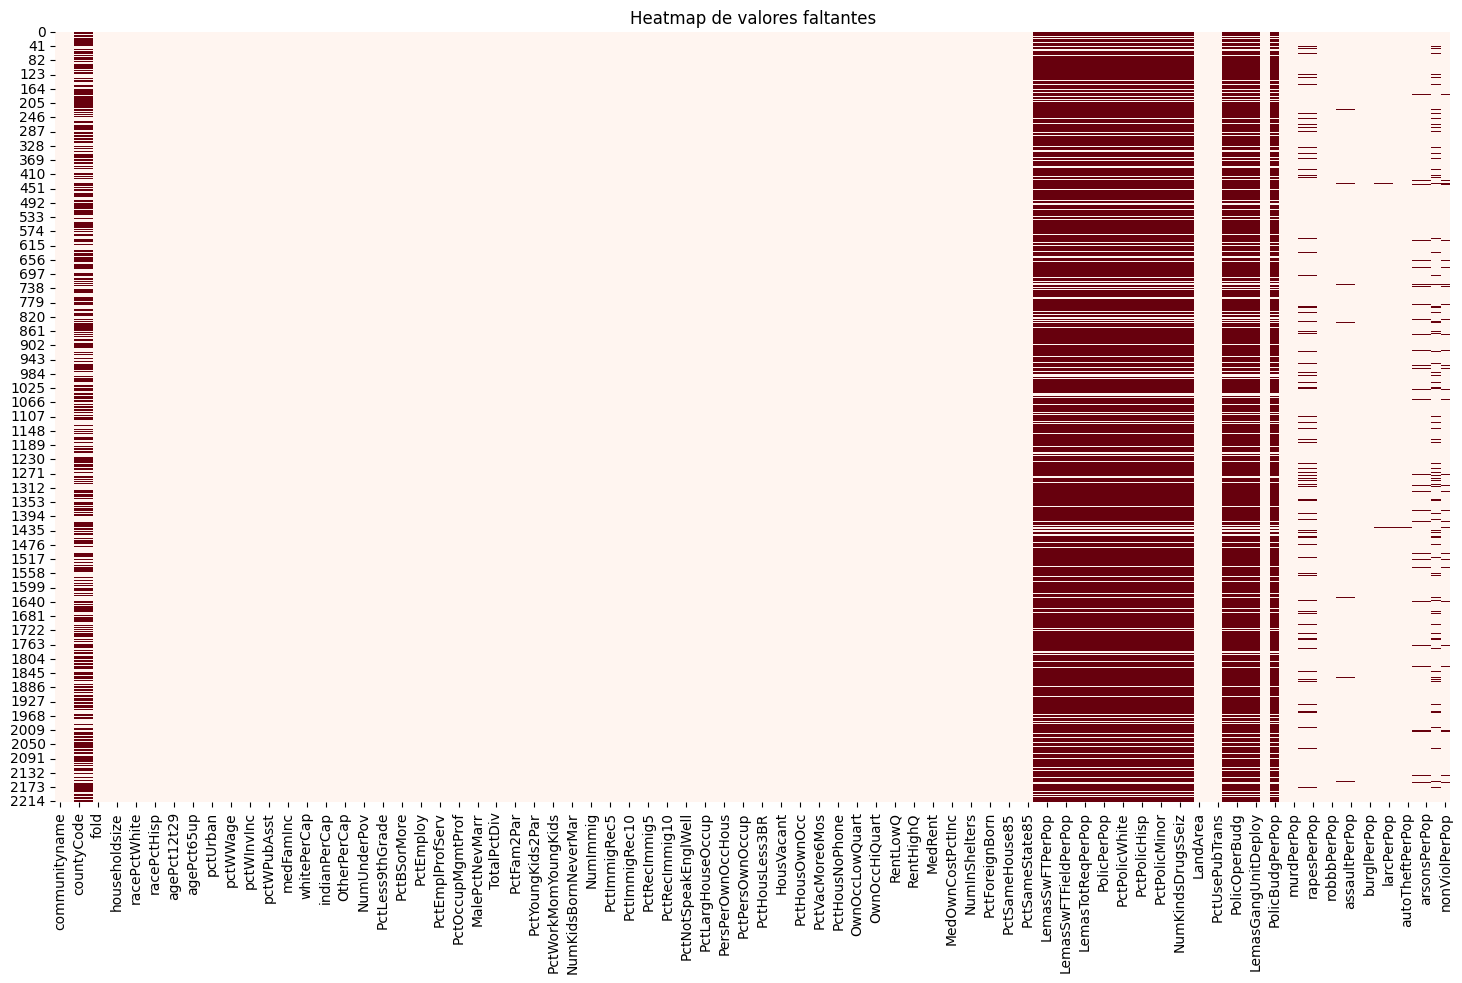

In [16]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_orig.isnull(), cbar=False, cmap='Reds')
plt.title("Heatmap de valores faltantes")
plt.show()

Verificamos si hay datos duplicados

In [17]:
df_orig[df_orig.duplicated() == True]

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop


Sin valores duplicados

Evaluamos el porcentaje de datos perdidos o nulos

In [18]:
perd_nul= df_orig.isna().mean().sort_values(ascending=False)
perd_nul.sample(30)


,0
murdPerPop,0.000000
blackPerCap,0.000000
MedOwnCostPctInc,0.000000
RentMedian,0.000000
PctLargHouseFam,0.000000
arsonsPerPop,0.041084
NumKindsDrugsSeiz,0.845147
fold,0.000000
PctRecImmig5,0.000000
MedOwnCostPctIncNoMtg,0.000000


Limpieza de columnas que no aportan información para el objetivo y modificación de tipos de datos

In [19]:
thresh = 0.8  # Porcentaje de datos nulos o perdidos de referencia
elim_cols = perd_nul[perd_nul > thresh].index.tolist()
print('Eliminar columnas (>80% missing):', elim_cols) # se eliminan columnas con 80% nulos/perd
df_Col_final = df_orig.drop(columns=elim_cols).copy()


Eliminar columnas (>80% missing): ['PctPolicBlack', 'PolicReqPerOffic', 'PolicPerPop', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'PolicAveOTWorked', 'LemasGangUnitDeploy', 'PolicBudgPerPop', 'PctPolicWhite', 'RacialMatchCommPol', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'NumKindsDrugsSeiz', 'OfficAssgnDrugUnits', 'PctPolicMinor', 'PctPolicAsian', 'LemasTotReqPerPop', 'LemasTotalReq', 'PctPolicHisp']


In [20]:
for c in df_Col_final.columns:
    if df_Col_final[c].dtype == object and c not in ['state','countyCode','communityCode','communityname','fold']:
        df_Col_final[c] = pd.to_numeric(df_Col_final[c], errors='coerce') # Convierte los valores numéricos en NaN


Elimino otras columnas que no son de interes

In [21]:
otras_col_no_interes = ['state', 'countyCode', 'communityCode', 'communityname', 'fold']
df_Col_final = df_Col_final.drop(columns=otras_col_no_interes)

Verificación de cambios

In [22]:
print(df_Col_final.dtypes)

population               int64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
                        ...   
autoTheftPerPop        float64
arsons                 float64
arsonsPerPop           float64
ViolentCrimesPerPop    float64
nonViolPerPop          float64
Length: 120, dtype: object


In [23]:
df_Col_final.describe(percentiles=[i/10 for i in range(1, 10)]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
population,2215.0,53117.984199,204620.252853,10005.00,11530.800,13226.800,15574.000,18776.000,22792.000,28239.800,36413.800,51567.600,85490.200,7322564.00
householdsize,2215.0,2.707327,0.334120,1.60,2.380,2.470,2.530,2.590,2.660,2.730,2.800,2.900,3.070,5.28
racepctblack,2215.0,9.335102,14.247156,0.00,0.340,0.670,1.060,1.660,2.870,4.860,8.296,15.594,29.318,96.67
racePctWhite,2215.0,83.979819,16.419080,2.68,59.848,72.656,80.176,86.218,90.350,93.260,95.288,97.010,98.086,99.63
racePctAsian,2215.0,2.670203,4.473843,0.03,0.370,0.530,0.712,0.940,1.230,1.640,2.230,3.450,6.082,57.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
autoTheftPerPop,2212.0,473.965628,504.666026,6.55,87.603,134.288,180.123,236.998,302.355,380.164,515.572,705.442,1103.735,4968.59
arsons,2124.0,30.907721,180.125248,0.00,0.000,1.000,2.000,3.000,5.000,8.000,12.000,20.000,44.700,5119.00
arsonsPerPop,2124.0,32.153682,39.240900,0.00,0.000,5.628,9.160,15.006,21.080,27.898,37.742,49.734,74.432,436.37
ViolentCrimesPerPop,1994.0,589.078922,614.784518,0.00,80.156,133.560,203.654,278.432,374.060,501.828,673.689,935.200,1420.736,4877.06


In [33]:
print("Dimención final:", df_Col_final.shape)

Dimención final: (2215, 122)


# Análisis exploratorio de los datos (EDA)

## Análisis univariado

Distribución de la variable objetivo

In [24]:
if 'ViolentCrimesPerPop' in df_Col_final.columns:
    target = 'ViolentCrimesPerPop'
else:
    target = df_Col_final.columns[-1]

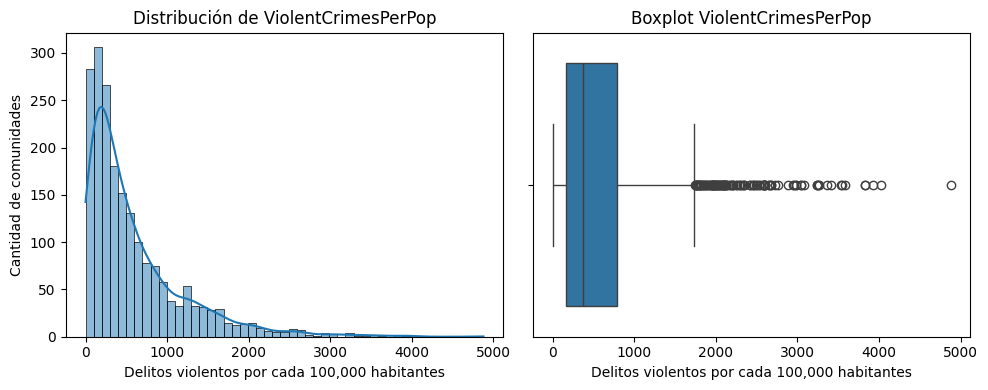

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_Col_final[target].dropna(), kde=True)
plt.title('Distribución de ' + target)
plt.xlabel('Delitos violentos por cada 100,000 habitantes')
plt.ylabel('Cantidad de comunidades')
plt.subplot(1,2,2)
sns.boxplot(x=df_Col_final[target])
plt.title('Boxplot ' + target)
plt.xlabel('Delitos violentos por cada 100,000 habitantes')
plt.tight_layout()

Se observa que la variable muestra una fuerte asimetría positiva: la mayoría de las comunidades tienen baja tasa de delitos, pero unas pocas presentan valores muy altos.
Se observan outliers que podrían corresponder a comunidades con alto riesgo social o urbano.

## Análisis multivariado

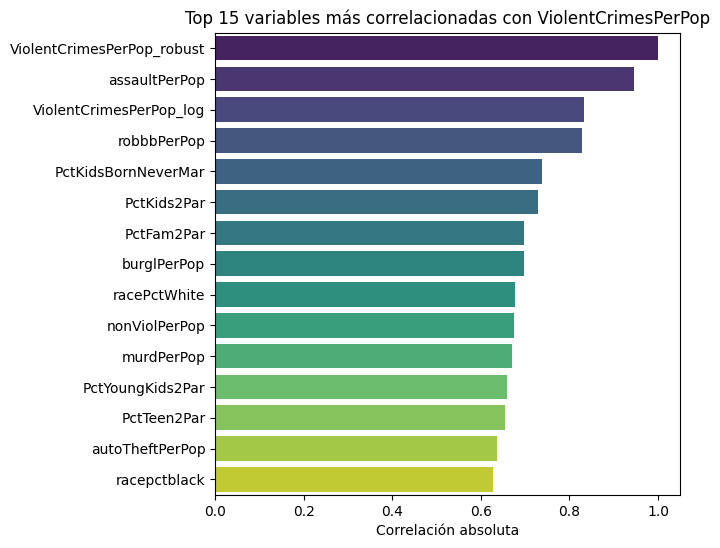

,index,abs_corr
0,ViolentCrimesPerPop_robust,1.000000
1,assaultPerPop,0.945566
2,ViolentCrimesPerPop_log,0.833755
3,robbbPerPop,0.828574
4,PctKidsBornNeverMar,0.738089
5,PctKids2Par,0.728059
6,PctFam2Par,0.698641
7,burglPerPop,0.698553
8,racePctWhite,0.676849
9,nonViolPerPop,0.675374


In [34]:
numeric_cols = df_Col_final.select_dtypes(include=np.number).columns
corr = df_Col_final[numeric_cols].corr()[target].abs().sort_values(ascending=False)
top_corr = corr[1:16]  # excluir la correlación consigo misma
top_corr_df = top_corr.reset_index().rename(columns={target:'abs_corr'})

plt.figure(figsize=(6,6))
sns.barplot(y='index', x='abs_corr', data=top_corr_df, palette='viridis')
plt.title('Top 15 variables más correlacionadas con ViolentCrimesPerPop')
plt.xlabel('Correlación absoluta')
plt.ylabel('')
plt.show()

top_corr_df.head(15)

Las variables más relacionadas con los crímenes violentos son aquellas asociadas a pobreza, educación y estructura familiar.
Esto sugiere que los factores socioeconómicos tienen un peso significativo en el nivel de criminalidad.